# Financial Service Use in Tanzania
___

## 1. Introduction

The report at hand will use data from the FSDT Finscope 2017 survey, which contains demographic information and financial service details of around 10,000 individuals in Tanzania. The dataset is a geospatial map of all cash outlets in Tanzania in 2012, which includes commercial banks, community banks, ATMs, micro-finance institutions, mobile money agents, bus stations, and post offices.

In this report, we will start by loading the dataset and checking for any missing observations or invalid data columns, followed by cleaning and processing the data. We will then obtain test statistics for the dataset and analyze it using visualizations to answer questions and draw conclusions based on the dataset.

### 1.1 Importing necessary libraries

The following python libraries will be imported to aid in the analysis of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Loading the dataset into the notebook

In [2]:
training_data = "../data/training.csv"

financial_df = pd.read_csv(training_data, sep=",")
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7094 non-null   int64  
 1   Q1                           7094 non-null   int64  
 2   Q2                           7094 non-null   int64  
 3   Q3                           7094 non-null   int64  
 4   Q4                           7094 non-null   int64  
 5   Q5                           7094 non-null   int64  
 6   Q6                           7094 non-null   int64  
 7   Q7                           7094 non-null   int64  
 8   Q8_1                         7094 non-null   int64  
 9   Q8_2                         7094 non-null   int64  
 10  Q8_3                         7094 non-null   int64  
 11  Q8_4                         7094 non-null   int64  
 12  Q8_5                         7094 non-null   int64  
 13  Q8_6              

The `.info()` attribute reveals that the dataset consists of 7094 rows and 37 columns. All the columns except the `Latitude` and `Longitude` columns are of type int64, whereas the 2 columns are float64 types. There do not appear to be any null values across all the columns. 

What this tells us is that the FSDT Finscope 2017 survey was conducted on 7094 individuals and all of them responded to all the questions asked. Now a snapshot of what the dataframe looks like.

In [3]:
financial_df.head(10)

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3
5,5462,35,1,1,3,3,2,1,0,1,...,-1,1,1,-6.362331,37.137741,0,0,1,0,1
6,4886,31,2,1,3,1,2,1,0,1,...,-1,1,2,-8.089257,35.836415,1,1,1,1,3
7,621,23,2,4,5,5,2,1,0,0,...,1,2,2,-8.916028,33.433904,1,1,0,0,3
8,8302,56,2,3,3,3,2,2,0,1,...,-1,1,1,-3.972247,32.649951,0,1,1,0,1
9,4704,37,2,1,3,3,2,1,0,1,...,-1,1,4,-8.033973,35.769416,1,0,0,1,3


___

## 2. Data Processing

### 2.1 Data validation

The dataframe looks good, there are no missing values so the need to deal with any is not required, the next step is to check whether the values within the dataframe are within the correct range for the respective columns. What is meant by this? Each column aside from the `Latitude` and `Longitude` contains numbers corresponding to answers based on the [table](http://syllabus.africacode.net/projects/data-science-specific/data-visualisation/mobile-money-viz/#:~:text=The%20table%20below%20gives%20the%20variable%20names%20in%20the%20mobile%20money%20data%20file%2C%20with%20a%20description%20of%20the%20questions%20and%20a%20key%20to%20the%20answer%20values.) on the instructions webpage. 

The next step is to verify if the numbers within the columns correspond to the key pairings.

In [4]:
def validate_column_keys(dataframe, column_names, range_of_keys):
    invalid_rows = {}
    
    if isinstance(column_names, str):
        column_names = [column_names]
    
    for column in column_names:
        invalid_rows[column] = []
        for index, value in dataframe[column].items():
            if value not in range_of_keys:
                invalid_rows[column].append(index)

    for column, rows in invalid_rows.items():
        if rows:
            print(f"Invalid rows for column '{column}':")
            invalid_data = dataframe.loc[rows]
            print(invalid_data)    


        else:
            print(f"All values in column '{column}' are valid.")

The following function will look at the specific columns and determine if the values within these columns correspond to the key value answers given in the table. If there are values which do not belong in their respective columns they will be investigated to determine what to do with these entries. 

The first check is for Q3, which takes either 1, 2, 3 or 4

In [5]:
validate_column_keys(financial_df, "Q3", range(1,5))

All values in column 'Q3' are valid.


It seems all values values are valid in the column `Q3`. The next columns to check are the ones that have yes/no answers that correspond to 1 and 2 and ones that correspond to 1 and 0 respectively.

In [6]:
columns_with_1_and_0_keys = ["Q8_1","Q8_2", "Q8_3","Q8_4","Q8_5","Q8_6","Q8_7","Q8_8","Q8_9","Q8_10","Q8_11","mobile_money","savings","borrowing","insurance"]

columns_with_1_and_2_keys = ["Q6","Q7","Q12","Q14",]

validate_column_keys(financial_df, columns_with_1_and_0_keys,  range(0,2))
validate_column_keys(financial_df, columns_with_1_and_2_keys,  range(1,3))

All values in column 'Q8_1' are valid.
All values in column 'Q8_2' are valid.
All values in column 'Q8_3' are valid.
All values in column 'Q8_4' are valid.
All values in column 'Q8_5' are valid.
All values in column 'Q8_6' are valid.
All values in column 'Q8_7' are valid.
All values in column 'Q8_8' are valid.
All values in column 'Q8_9' are valid.
All values in column 'Q8_10' are valid.
All values in column 'Q8_11' are valid.
All values in column 'mobile_money' are valid.
All values in column 'savings' are valid.
All values in column 'borrowing' are valid.
All values in column 'insurance' are valid.
All values in column 'Q6' are valid.
All values in column 'Q7' are valid.
All values in column 'Q12' are valid.
All values in column 'Q14' are valid.


This step has checked the validity for a majority of the columns, the next validation columns are for the highest level of education complete, `Q4` which takes in values ranging from 1-7, "Which of the following applies to you, `Q5` which takes in values ranging from 1-6.

In [7]:
validate_column_keys(financial_df, "Q4", range(1, 8))

Invalid rows for column 'Q4':
        ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8_1  Q8_2  ...  Q17  Q18  Q19  \
1053  3536  69   1   3   8   1   2   1     0     0  ...   -1    1    1   
2486   636  71   1   1   8   1   2   1     0     0  ...    1    1    1   

      Latitude  Longitude  mobile_money  savings  borrowing  insurance  \
1053 -1.749394  31.615438             1        0          0          0   
2486 -2.488087  32.924264             1        1          0          1   

      mobile_money_classification  
1053                            2  
2486                            3  

[2 rows x 37 columns]


For the column `Q4` there were values outside the range of acceptable answers. Users `3536` and `636` entered the value 8, which is invalid since the last option is 7. The best method would be to replace these values with a statistically significant value. The mode of the column is a suitable option for dealing with categorical data.

In [8]:
mode_Q4 = financial_df['Q4'].mode()[0]

invalid_value_indexes = [1053, 2486]

for index in invalid_value_indexes:
    financial_df.at[index, 'Q4'] = mode_Q4

print(financial_df.loc[invalid_value_indexes])

        ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8_1  Q8_2  ...  Q17  Q18  Q19  \
1053  3536  69   1   3   3   1   2   1     0     0  ...   -1    1    1   
2486   636  71   1   1   3   1   2   1     0     0  ...    1    1    1   

      Latitude  Longitude  mobile_money  savings  borrowing  insurance  \
1053 -1.749394  31.615438             1        0          0          0   
2486 -2.488087  32.924264             1        1          0          1   

      mobile_money_classification  
1053                            2  
2486                            3  

[2 rows x 37 columns]


The invalid values have been replaced in the dataframe for the column `Q4`

In [9]:
validate_column_keys(financial_df, "Q5", range(1, 7))

All values in column 'Q5' are valid.



Next, is the `Q13` column which asks the users when was the last time they sent money and the `Q15` column which asks users when last they received money.

In [10]:
money_range = list(range(-1, 0)) + list(range(0, 7))
validate_column_keys(financial_df, "Q13", money_range)

All values in column 'Q13' are valid.


In [11]:
validate_column_keys(financial_df, "Q15", money_range)

All values in column 'Q15' are valid.


Both columns are valid. The next columns are `Q16` which asks users how often they use mobile money for purchases of goods and/or services in the past 12 months and column `Q17`  which asks users how often they use mobile money for paying their bill within the last 12 months.

In [12]:
mobile_money_range = list(range(-1, 0)) + list(range(0, 6))
validate_column_keys(financial_df, "Q16", mobile_money_range)

All values in column 'Q16' are valid.


In [13]:
validate_column_keys(financial_df, "Q17", mobile_money_range)

All values in column 'Q17' are valid.


Both columns appear to be valid. The next columns will deal with the user's language literacy knowledge. The next columns checked will be column `Q18` which asks users about their literacy in Kiswhahili and column `Q19` which checks their literacy in English.

In [14]:
validate_column_keys(financial_df, "Q18", range(0, 6))
validate_column_keys(financial_df, "Q19", range(0, 6))

All values in column 'Q18' are valid.
All values in column 'Q19' are valid.


The next 3 columns to validate are columns `Q9`, `Q10` and `Q11` these are different because, in addition to their answers being within the accepted range, they are also based on whether the individual indicated yes, being `1` for columns `Q8_1`, `Q8_2` and `Q8_3` respectively. To check the validity another condition would have to be added to see if a user answered yes or no.

For `Q9` which checks who the individual works for, this one starts with a -1 and checks the range 1-7 skipping 0. To overcome this situation for the function, a new list which would be a combination of the list that ranges from -1 - 0 (0 exclusive) and 1-7 would be suitable to test the validity of the column.


In [15]:
def validate_if_answer_yes(dataframe, column_to_validate, yes_no_column, range_of_answer):
    invalid_rows_indices = []
    removed_ids = []
    
    for index, value in dataframe[yes_no_column].items():
        dependent_value = dataframe.loc[index, column_to_validate]
        if (value == 1 and dependent_value not in range_of_answer[1:]) or (value == 0 and dependent_value != -1):
            invalid_rows_indices.append(index)
            removed_ids.append(dataframe.loc[index, 'ID'])
    
    if invalid_rows_indices:        
        print("The following responses are invalid")
        invalid_data = dataframe.loc[invalid_rows_indices]
        print(invalid_data)
    else:
        validate_column_keys(dataframe, column_to_validate, range_of_answer)
    

employment_type_range = list(range(-1, 0)) + list(range(1, 8))

validate_if_answer_yes(financial_df, "Q9", "Q8_1", employment_type_range)

All values in column 'Q9' are valid.


The code checked if the answers in `Q9` are within the accepted range and correspond to the answers `Q8_1`. 
Next are the `Q10` and `Q11` columns which check if the answers in columns `Q8_2` and `Q8_3` correspond with the responses and if the answers are within the acceptable range.

Instead of using the `validate_if_answer_yes` function with columns `Q10` and `Q11` the function `validate_column_keys` will be used instead. The reason for this is because `validate_if_answer_yes` checks if users answered yes to the subquestions within question 8 then they should not choose `not applicable` for the corresponding questions. This does not apply in the cases of column `Q10` which asks users `What kind of things do you MAINLY sell`, this implies that the users could sell things as some form of additional income whilst not selling things mainly 

In [16]:
selling_things_range = list(range(-1, 0)) + list(range(1, 11))
validate_column_keys(financial_df, "Q10", selling_things_range)

All values in column 'Q10' are valid.


The function indicates that all the values in column `Q10` are valid. The next column `Q11` has the same condition, it asks users `" what kind of services do you MAINLY provide (get the most money from)?"` This means that while the users might indicate in column `Q8_3` that they get money from providing a service it might not be their main method of getting money, thus they could also suggest that the responses from `Q11` might not apply to them as the services listed could be seen as side hustles for them. This means to validate the values of `Q11` the function `validate_column_keys` is suitable.

In [17]:
providing_service_range = list(range(-1, 0)) + list(range(1, 13))
validate_column_keys(financial_df, "Q11", providing_service_range)

All values in column 'Q11' are valid.


The results from `validate_column_keys` indicate that all the values in the column are valid. The final column to check is the last, `Mobile_money_classification` 

In [18]:
validate_column_keys(financial_df, "mobile_money_classification", range(0, 4))

All values in column 'mobile_money_classification' are valid.


All the values in all the columns are valid and their answers fall within the expected range of each answer key. 

### 2.2 Cleaning dataframe column names

With the values of the dataframe validated the next step is to rename the columns to more appropriate names that will be easeier to follow as the analysis of the dataframe continues. 

In [19]:
column_name_mapping = {
    'ID': 'User ID',
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Marital status',
    'Q4': 'Highest level of education completed?',
    'Q5': 'Ownership of land/plot',
    'Q6': 'Ownership of land with certificates',
    'Q7': 'Ownership of mobile phone',
    'Q8_1': 'Salaries/wages',
    'Q8_2': 'Trading/selling produce',
    'Q8_3': 'Service providing income',
    'Q8_4': 'Piece work/Casual labor',
    'Q8_5': 'Rental income',
    'Q8_6': 'Interest from savings/investments',
    'Q8_7': 'Pension',
    'Q8_8': 'Social welfare grant',
    'Q8_9': 'Receive money from others',
    'Q8_10': 'Expenses covered by others',
    'Q8_11': 'Other income',
    'Q9': 'Employment type',
    'Q10': 'Main items sold',
    'Q11': 'Main services provided',
    'Q12': 'Sent money in last 12 months?',
    'Q13': 'Last time sent money',
    'Q14': 'Received money in last 12 months?',
    'Q15': 'Last time received money',
    'Q16': 'Frequency of mobile money usage for purchases',
    'Q17': 'Frequency of mobile money usage for bill payment',
    'Q18': 'Literacy in Kiswahili',
    'Q19': 'Literacy in English',
    'mobile_money': 'Use of mobile money',
    'savings': 'Savings behavior',
    'borrowing': 'Borrowing behavior',
    'insurance': 'Insurance ownership',
    'mobile_money_classification': 'Mobile money classification'
}

financial_df = financial_df.rename(columns=column_name_mapping)

financial_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   User ID                                           7094 non-null   int64  
 1   Age                                               7094 non-null   int64  
 2   Gender                                            7094 non-null   int64  
 3   Marital status                                    7094 non-null   int64  
 4   Highest level of education completed?             7094 non-null   int64  
 5   Ownership of land/plot                            7094 non-null   int64  
 6   Ownership of land with certificates               7094 non-null   int64  
 7   Ownership of mobile phone                         7094 non-null   int64  
 8   Salaries/wages                                    7094 non-null   int64  
 9   Trading/selling pro

### 2.3 Modifying reponses for analyses

To make it easier to plot any graphs or determine any statistic of the categorical data that will be analysed, the numerical responses of all the columns will be altered to the actual responses.

In [20]:
replacement_dict = {
    'Gender': {
        1: 'Male',
        2: 'Female'
    },
    
    'Marital status': {
        1: 'Married',
        2: 'Divorced',
        3: 'Widowed',
        4: 'Single/never married'
    },
    
    'Highest level of education completed?': {
        1: 'No formal education',
        2: 'Some primary',
        3: 'Primary completed',
        4: 'Post primary technical training',
        5: 'Some secondary',
        6: 'University or other higher education',
        7: 'Do not know'
    },
    
    'Ownership of land/plot': {
        1: 'You personally own the land/plot where you live',
        2: 'You own the land/plot together with someone else',
        3: 'A household member owns the land/plot',
        4: 'The land/plot is rented',
        5: 'You do not own or rent the land',
        6: 'Do not know'
    },
    
    'Ownership of land with certificates': {
        1: 'Yes',
        2: 'No'
    },
    
    'Ownership of mobile phone': {
        1: 'Yes',
        2: 'No'
    },
    
    'Salaries/wages': {
        1: 'Yes',
        0: 'No'
    },
    
    'Trading/selling produce': {
        1: 'Yes',
        0: 'No'
    },
    
    'Service providing income': {
        1: 'Yes',
        0: 'No'
    },
    
    'Piece work/Casual labor': {
        1: 'Yes',
        0: 'No'
    },
    
    'Rental income': {
        1: 'Yes',
        0: 'No'
    },
    
    'Interest from savings/investments': {
        1: 'Yes',
        0: 'No'
    },
    
    'Pension': {
        1: 'Yes',
        0: 'No'
    },
    
    'Social welfare grant': {
        1: 'Yes',
        0: 'No'
    },
    
    'Receive money from others': {
        1: 'Yes',
        0: 'No'
    },
    
    'Expenses covered by others': {
        1: 'Yes',
        0: 'No'
    },
    
    'Other income': {
        1: 'Yes',
        0: 'No'
    },
    
    'Employment type': {
        -1: 'Not applicable',
        1: 'Government',
        2: 'Private company/business',
        3: 'Individual who owns his own business',
        4: 'Small scale farmer',
        5: 'Commercial farmer',
        6: 'Work for individual/household e.g. security guard, maid etc.',
        7: 'Other'
    },
    
    'Main items sold': {
        -1: 'Not applicable',
        1: 'Crops/produce I grow',
        2: 'Products I get from livestock',
        3: 'Livestock',
        4: 'Fish you catch yourself/aquaculture',
        5: 'Things you buy from others - agricultural products',
        6: 'Things you buy from others - non-agricultural products',
        7: 'Things you make (clothes, art, crafts)',
        8: 'Things you collect from nature (stones, sand, thatch, herbs)',
        9: 'Things you process (honey, dairy products, flour)',
        10: 'Other'
    },
    
    'Main services provided': {
        -1: 'Not applicable',
        1: 'Personal services (hairdressers, massage, etc.)',
        2: 'Telecommunications/IT',
        3: 'Financial services',
        4: 'Transport',
        5: 'Hospitality /Accommodation, restaurants, etc.',
        6: 'Information/research',
        7: 'Technical - mechanic, etc.',
        8: 'Educational/child care',
        9: 'Health services - traditional healer etc.',
        10: 'Legal services',
        11: 'Security',
        12: 'Other, specify'
    },
    
    'Sent money in last 12 months?': {
        1: 'Yes',
        2: 'No'
    },
    
    'Last time sent money': {
        -1: 'Not applicable',
        1: 'Yesterday/today',
        2: 'In the past 7 days',
        3: 'In the past 30 days',
        4: 'In the past 90 days',
        5: 'More than 90 days ago but less than 6 months ago',
        6: '6 months or longer ago'
    },
    
    'Received money in last 12 months?': {
        1: 'Yes',
        2: 'No'
    },
    
    'Last time received money': {
        -1: 'Not applicable',
        1: 'Yesterday/today',
        2: 'In the past 7 days',
        3: 'In the past 30 days',
        4: 'In the past 90 days',
        5: 'More than 90 days ago but less than 6 months ago',
        6: '6 months or longer ago'
    },
    
    'Frequency of mobile money usage for purchases': {
        -1: 'Not applicable',
        1: 'Never',
        2: 'Daily',
        3: 'Weekly',
        4: 'Monthly',
        5: 'Less often than monthly'
    },
    
    'Frequency of mobile money usage for bill payment': {
        -1: 'Not applicable',
        1: 'Never',
        2: 'Daily',
        3: 'Weekly',
        4: 'Monthly',
        5: 'Less often than monthly'
    },
    
    'Literacy in Kiswahili': {
        1: 'Can read and write',
        2: 'Can read only',
        3: 'Can write only',
        4: 'Can neither read nor write',
        5: 'Refused to read'
    },
    
    'Literacy in English': {
        1: 'Can read and write',
        2: 'Can read only',
        3: 'Can write only',
        4: 'Can neither read nor write',
        5: 'Refused to read'
    },
    
    'Use of mobile money': {
        1: 'Yes',
        0: 'No'
    },
    
    'Savings behavior': {
        1: 'Yes',
        0: 'No'
    },
    
    'Borrowing behavior': {
        1: 'Yes',
        0: 'No'
    },

    'Insurance ownership': {
        1: 'Yes',
        0: 'No'
    },

    'Mobile money classification': {
        0: 'Does not use any financial service',
        1: 'Does not use mobile money',
        2: 'Uses mobile money only',
        3: 'Uses both'
    }

}


for column, replacements in replacement_dict.items():
    financial_df[column] = financial_df[column].replace(replacements)

financial_df.head()

,User ID,Age,Gender,Marital status,Highest level of education completed?,Ownership of land/plot,Ownership of land with certificates,Ownership of mobile phone,Salaries/wages,Trading/selling produce,...,Frequency of mobile money usage for bill payment,Literacy in Kiswahili,Literacy in English,Latitude,Longitude,Use of mobile money,Savings behavior,Borrowing behavior,Insurance ownership,Mobile money classification
0,5086,98,Female,Widowed,No formal education,You personally own the land/plot where you live,No,No,No,No,...,Not applicable,Can neither read nor write,Can neither read nor write,-4.460442,29.811396,No,No,No,No,Does not use any financial service
1,1258,40,Male,Married,Primary completed,You do not own or rent the land,Yes,Yes,Yes,No,...,Monthly,Can read and write,Can neither read nor write,-6.176438,39.244871,Yes,Yes,Yes,No,Uses both
2,331,18,Female,Single/never married,University or other higher education,A household member owns the land/plot,No,Yes,No,No,...,Not applicable,Can read and write,Can read and write,-6.825702,37.652798,Yes,No,No,No,Uses mobile money only
3,6729,50,Male,Married,Primary completed,You personally own the land/plot where you live,Yes,Yes,No,No,...,Not applicable,Can read and write,Can neither read nor write,-3.372049,35.808307,Yes,No,Yes,No,Uses both
4,8671,34,Male,Married,No formal education,You personally own the land/plot where you live,No,Yes,No,Yes,...,Not applicable,Can read and write,Can neither read nor write,-7.179645,31.039095,Yes,Yes,No,Yes,Uses both


A parent dictionary was created with sub-dictionaries that correspond to column names where the numerical responses were substituted with the actual response. What followed was the looping through all the mentioned columns within `financial_df` and replacing the numerical values with actual responses using the `.replace()` attribute .

### 2.4 Observing the dataframe's statistics 

In [21]:
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   User ID                                           7094 non-null   int64  
 1   Age                                               7094 non-null   int64  
 2   Gender                                            7094 non-null   object 
 3   Marital status                                    7094 non-null   object 
 4   Highest level of education completed?             7094 non-null   object 
 5   Ownership of land/plot                            7094 non-null   object 
 6   Ownership of land with certificates               7094 non-null   object 
 7   Ownership of mobile phone                         7094 non-null   object 
 8   Salaries/wages                                    7094 non-null   object 
 9   Trading/selling pro

Now that the invalid answers have been removed from all the columns, it is time to observe the data's statistics to be able to see what insights about the data can be derived from the result.  

In [22]:
financial_df_age_statistic = round(financial_df["Age"].describe(), 2)
financial_df_age_statistic

count    7094.00
mean       38.24
std        16.33
min        16.00
25%        25.00
50%        35.00
75%        48.00
max       100.00
Name: Age, dtype: float64

From the `Age ' column, we see that the average age of the users is 38 years with a standard deviation of 16.36, this implies that there is not much variability in the ages due to the relatively small value of the standard deviation compared to the mean. The youngest individual is 16 years old and the oldest individual is 100 years old, the table also says that 75% of the users asked were 48 years or younger, this would imply that the 100 is a possible outlier, which would also account for the difference between the median and the mean.

The remaining columns within `financial_df` are object data types so how their test statistic will be determined is through the use of the code `financial_df.columns.astype('object').describe()` This will give a minor description of the statistics of the selected columns.


In [23]:
columns_to_describe = [ 'Gender', 'Marital status', 'Highest level of education completed?',
                       'Ownership of land/plot', 'Ownership of land with certificates',
                       'Ownership of mobile phone','Employment type', 'Main items sold', 'Main services provided',
                       'Sent money in last 12 months?', 'Last time sent money',
                       'Received money in last 12 months?', 'Last time received money', 'Literacy in Kiswahili',
                       'Literacy in English', 'Use of mobile money',
                       'Savings behavior', 'Borrowing behavior', 'Insurance ownership',
                       'Mobile money classification']


summary_stats = financial_df[columns_to_describe].astype('object').describe()

summary_stats

,Gender,Marital status,Highest level of education completed?,Ownership of land/plot,Ownership of land with certificates,Ownership of mobile phone,Employment type,Main items sold,Main services provided,Sent money in last 12 months?,Last time sent money,Received money in last 12 months?,Last time received money,Literacy in Kiswahili,Literacy in English,Use of mobile money,Savings behavior,Borrowing behavior,Insurance ownership,Mobile money classification
count,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094,7094
unique,2,4,7,6,2,2,7,11,11,2,7,2,7,5,5,2,2,2,2,4
top,Female,Married,Primary completed,You personally own the land/plot where you live,No,Yes,Not applicable,Crops/produce I grow,Not applicable,No,Not applicable,No,Not applicable,Can read and write,Can neither read nor write,Yes,No,No,No,Uses both
freq,3972,4548,3448,3002,5963,4271,6653,3300,6709,4971,4971,4417,4417,4945,4686,3930,3820,4023,6021,3126


The above statistic table for the dataframe looks at certain columns to see what can be discerned from them

The `Gender`column shows that more females responded to the survey than males with 56% of total responses. The `Marital status` column indicates that most users who responded to the survey were married. The `Highest level of education completed?` column tells us that the highest level completed for most responses is Primary School. Of the 7094 users who responded less than 50% indicated that they own the plot of land they live on personally. When observing their competency in both Swahili and English, 4945 indicated that they could read and write in Swahili but  4686 indicated that they could neither read nor write in English, both of these responses are over 65% respectively which should suggest that their language preference would be Swahili. When asked `Use of mobile money` 55% indicated yes with a total of 3930 responses. Regarding their classifications, the highest recorded responses were that users use both at 3126, less than 45%.

Whilst the table above supplies necessary descriptive information for the columns listed, for some columns (specifically the ones that will be looked at in the analysis) this might not seem enough so some visualisation will be included to see what further insights can be derived from these columns.


#### 2.4.1 Visual representation of column statistics and distribution

The following section will look at visual representation of the values of various columns. This is because the values in the columns are 'object' types the `describe()` method would not be the most suitable to fully analyze the test statistic of some columns

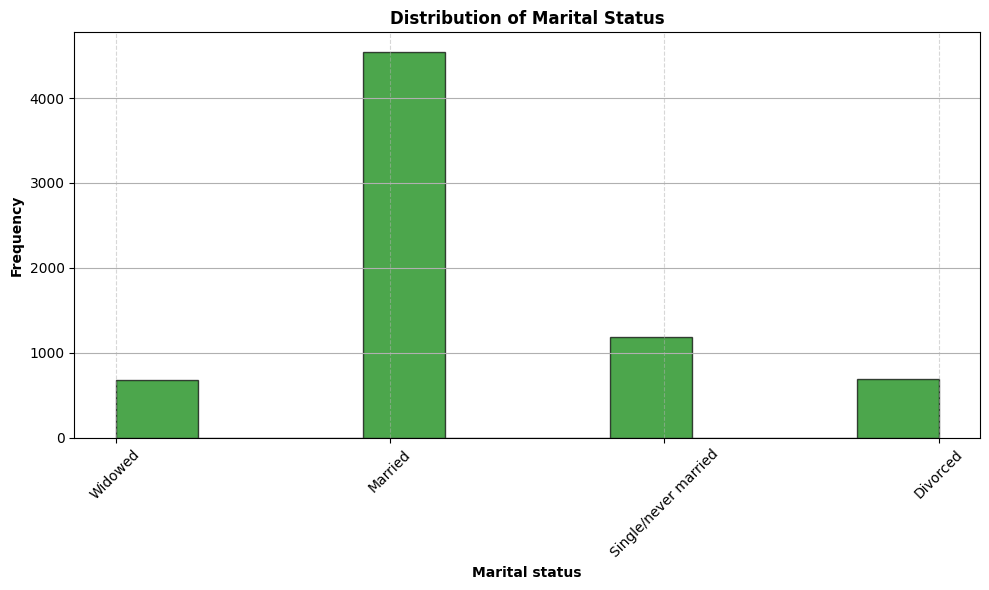

In [24]:
def visual_distribution(column_name, title):
    if column_name not in financial_df.columns:
        print(f"Column '{column_name}' not found in the dataframe.")
        return
    
    plt.figure(figsize=(10, 6))
    financial_df[column_name].hist(color='green',  edgecolor='black', alpha=0.7)
    plt.title(title, fontweight='bold')
    plt.xlabel(column_name, fontweight='bold')
    plt.xticks(rotation=45) 
    plt.ylabel("Frequency", fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

visual_distribution("Marital status", "Distribution of Marital Status")

From the graph above there is a very large difference between users who indicated that they were married compared to any other user with all other users responses being less that 1000 and only the `Single/Never married` response being over 1000

The next column to look at is the column on land owrnership and what its overall distribution looks like, not just the highest responses.

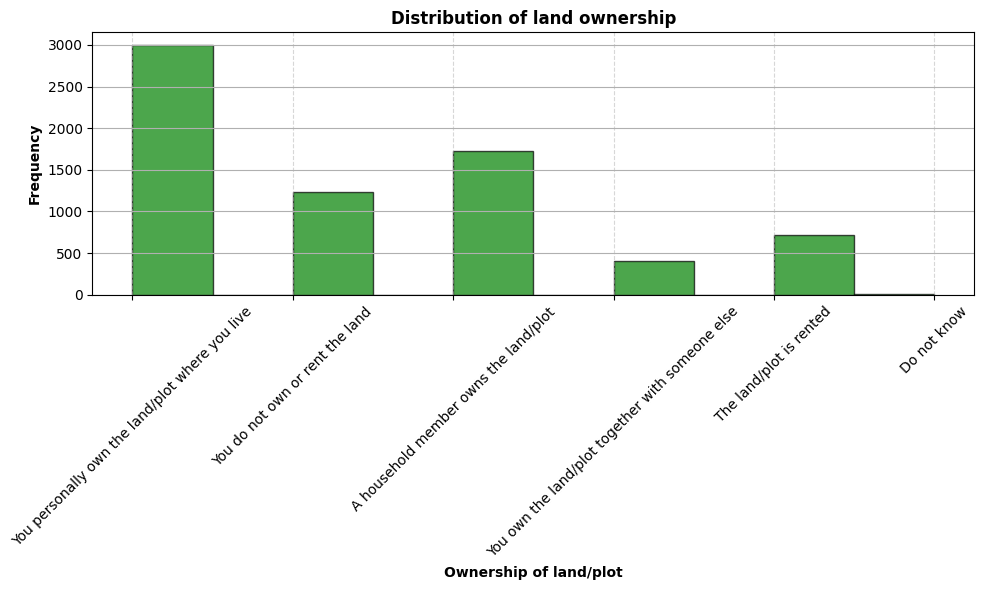

In [25]:
visual_distribution("Ownership of land/plot", "Distribution of land ownership")

Based on the results of this visualisation around 3000 users indicated they own the land where they live, followed by responses where they indicated that it is owned by a household member at approximately 1750 responses, followed by users who said that they do not own or rent the land they live on at 1250, with less than 1000 responses saying that they either own the land with someone else, the plot is rented or that they do not know. 

The last graph will look at the type of income that was indicated by each user.

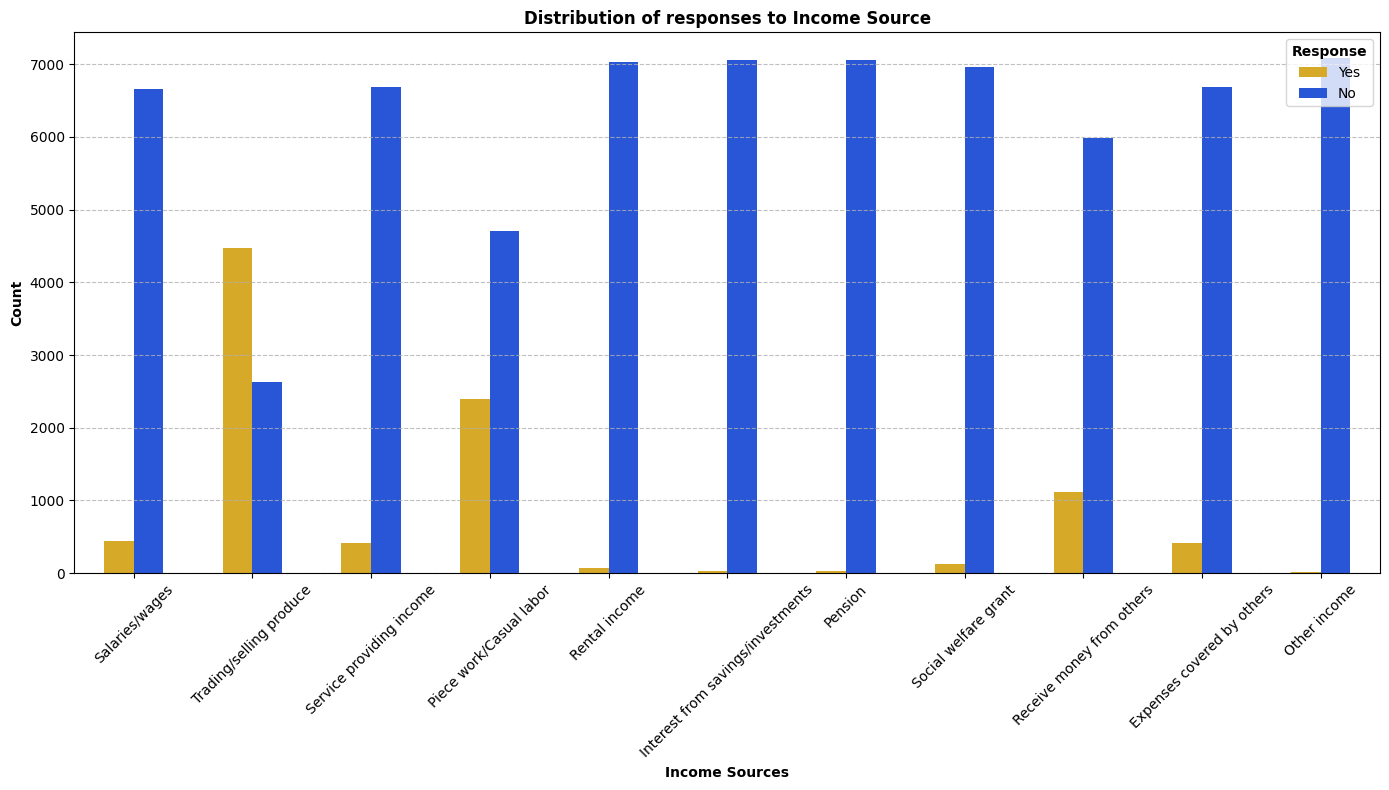

In [26]:
income_source_columns = ['Salaries/wages', 'Trading/selling produce', 'Service providing income', 
                   'Piece work/Casual labor', 'Rental income', 'Interest from savings/investments', 
                   'Pension', 'Social welfare grant', 'Receive money from others', 
                   'Expenses covered by others', 'Other income']

count_df = pd.DataFrame(columns=['Yes', 'No'])

for column in income_source_columns:
    yes_count = (financial_df[column] == 'Yes').sum()
    no_count = (financial_df[column] == 'No').sum()
    count_df.loc[column] = [yes_count, no_count]

custom_colors = ["#D7A928", "#2856d7"] 
count_df.plot(kind='bar', figsize=(14, 8), color=custom_colors)

plt.title('Distribution of responses to Income Source', fontweight='bold')
plt.xlabel('Income Sources', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=45)
legend = plt.legend(title='Response', labels=['Yes', 'No'], loc="best")
legend.get_title().set_fontweight('bold')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

When looking at the types of incomes listed in the survey and their responses side by side like this, the only source of income where the number of 'Yes' responses exceeds the number of 'No' responses is from trading/selling produce, this implies that amongst all the income sources listed, that this is the most common. Albeit, it is also possible that some users have more than one income source. The second highest responses that indicated 'Yes' with 2000 people were those who stated that they received their income from doing casual labour, followed by those who received money from others at slightly over 1000 responses followed by salary/wages and expenses covered by others and service providing income being almost equal with service providing being slightly higher.

___

## 3. Analysis

The best way to visually represent the relationship between different columns is by using graphs that are easy to interpret and understand.

### 3.1 The relationship between age and the type of financial service used

The relationship between the ages of the users as well as the type of financial service they use will be the first relationship to look at that will help determine if age is a factor in the type of financial service being used.

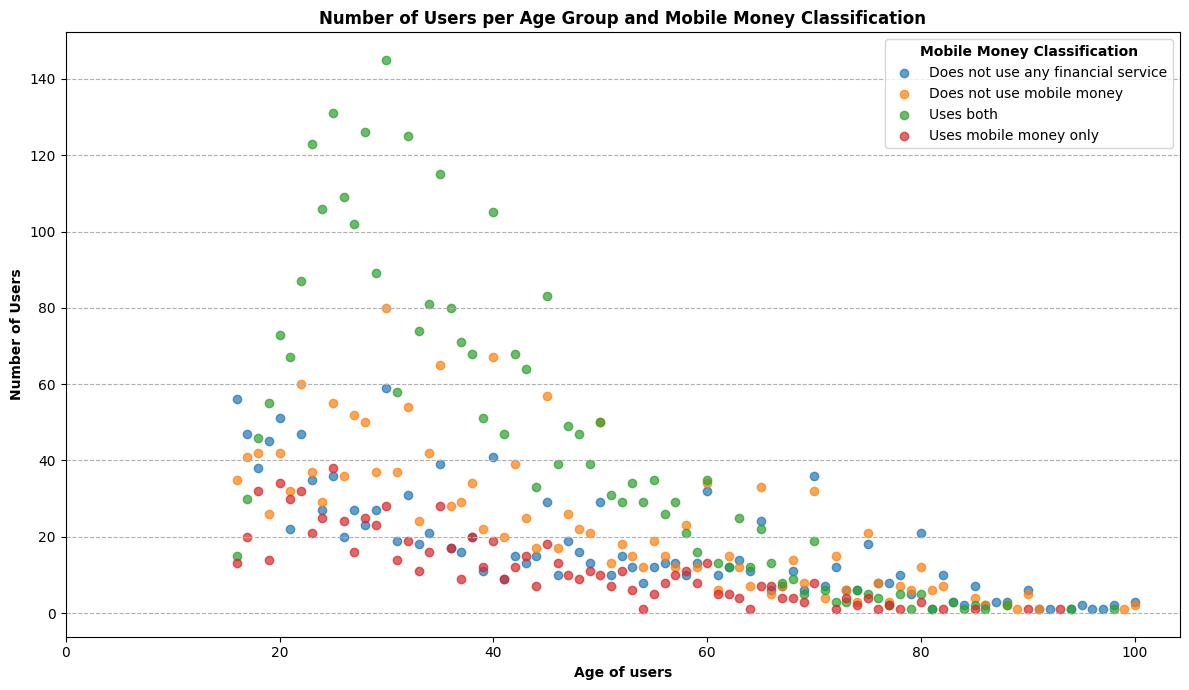

In [27]:
grouped_mobile_money_df = financial_df.groupby(['Age', 'Mobile money classification']).size().reset_index(name='User Count')

plt.figure(figsize=(12, 7))

for label, group in grouped_mobile_money_df.groupby('Mobile money classification'):
    plt.scatter(group['Age'], group['User Count'], label=label, alpha=0.7)

plt.xlabel('Age of users', fontweight='bold')
plt.ylabel('Number of Users', fontweight='bold')
plt.title('Number of Users per Age Group and Mobile Money Classification', fontweight='bold')
legend = plt.legend(title='Mobile Money Classification', loc='upper right')
legend.get_title().set_fontweight('bold')
plt.grid(axis='y', linestyle='--')
plt.xlim(left=0) 
plt.tight_layout()
plt.show()

The code above was created to plot the age of users and count them based on the type of mobile money classification they fall under in the `Mobile money classification` column. Each scatterplot represents the distribution shape.

The scatter plot above shows four distributions based on the classification of the type of financial service the users indicated they use.  

When observing the distribution for users who do not use any financial services. This scatterplot demonstrated a decreasing relationship as the age of the users increased, this relationship appears to be linear with some of the highest responses being within the mid-teens. This relation shows that the majority of these users are young which could also suggest that individuals who do not use any financial service are quite young, and perhaps they do not have enough money to justify using any financial service.

The second scatterplot represents the age distribution for mobile money users. This plot follows the same trend as the previous one that shows a constantly decreasing count as the age of the users increases, but what makes this distribution different is the lower count overall compared to the first scatter plot.

The third distribution showed the relationship between age and the non-use of mobile money. This scatterplot's distribution appears to be a minor decreasing graph that has a constant distribution from the midteens to the lower 40's then it proceeds to decrease as the age increases onwards. This implies that there is a moderate use of mobile money amongst the younger generation but the older generations do not use it all atl. 


The final distribution, for users who use mobile money and other financial service, resembles a normal curve skewed to the right. When looking at this distribution through the lens of a normal distribution it appears to have a peak between the 20s and the 40s at an age of around 31 - 32 and then proceeds to decrease as the age increases. When looking at this observation as a normal distribution, it also implies that the median is higher than the mean, this further supports the results from the test statistic that the mean age is between 20 and 40, which lies in the 30's.

### 3.2 The relationship between gender and the type of financial service used

In [28]:
def plot_mobile_money_classification(df, column, title, xlabel):
    grouped_data = df.groupby([column, 'Mobile money classification']).size().unstack(fill_value=0)
    grouped_data.plot(kind='bar', stacked=False, figsize=(12, 6))

    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel("Number of financial services users", fontweight='bold')
    
    legend = plt.legend(title='Mobile Money Classification', loc='best')
    legend.get_title().set_fontweight('bold')
    
    plt.xticks(rotation=45) 
    plt.grid(axis='y', linestyle='--', alpha=0.8)
    plt.tight_layout()
    plt.show()


The function above was coded to create a group bar graph to compare the different variables with the `Mobile Money Classification` column. A function was chosen to avoid the repetition of long lines of code as each distribution from here on will be of the same format.

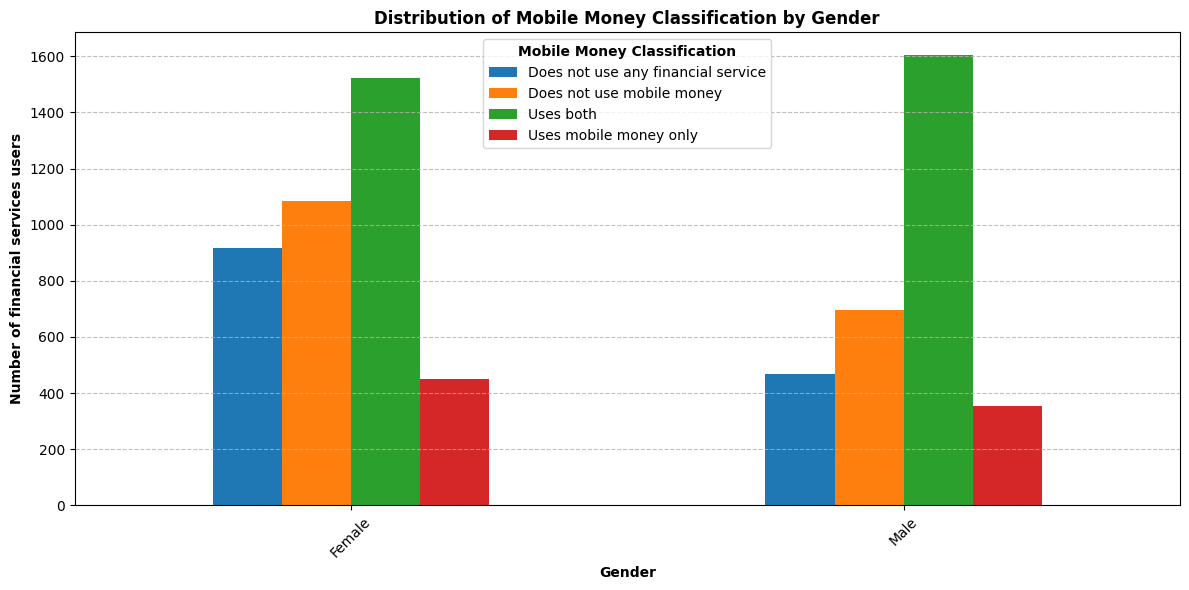

In [29]:

plot_mobile_money_classification(df=financial_df,
                                 column='Gender',
                                 title='Distribution of Mobile Money Classification by Gender',
                                 xlabel='Gender')



After analyzing the usage of financial services in Tanzania, it was found that both men and women follow similar trends. The lowest number of users in both genders indicated that they use mobile money exclusively, with female users showing a slightly higher number than male users, but the difference was less than 100 participants. The second least chosen option was the users who don't use any financial service at all. However, here the number of females who don't use any financial service far exceeds the number of male users who don't use any financial service, by approximately half the number of male users.

When observing users who use any financial service aside from mobile money, more female users indicated their preference than male users. This was the second most popular option chosen. The highest option chosen by both genders was the use of mobile money in combination with any other financial service. This was the only choice where the number of male participants was higher than that of female participants. 

The results indicate that both genders prefer to use mobile money concurrently with any other financial service. However, more males prefer to use a financial service other than mobile money. 

### 3.3 The relationship between maritial status and the type of financial service used

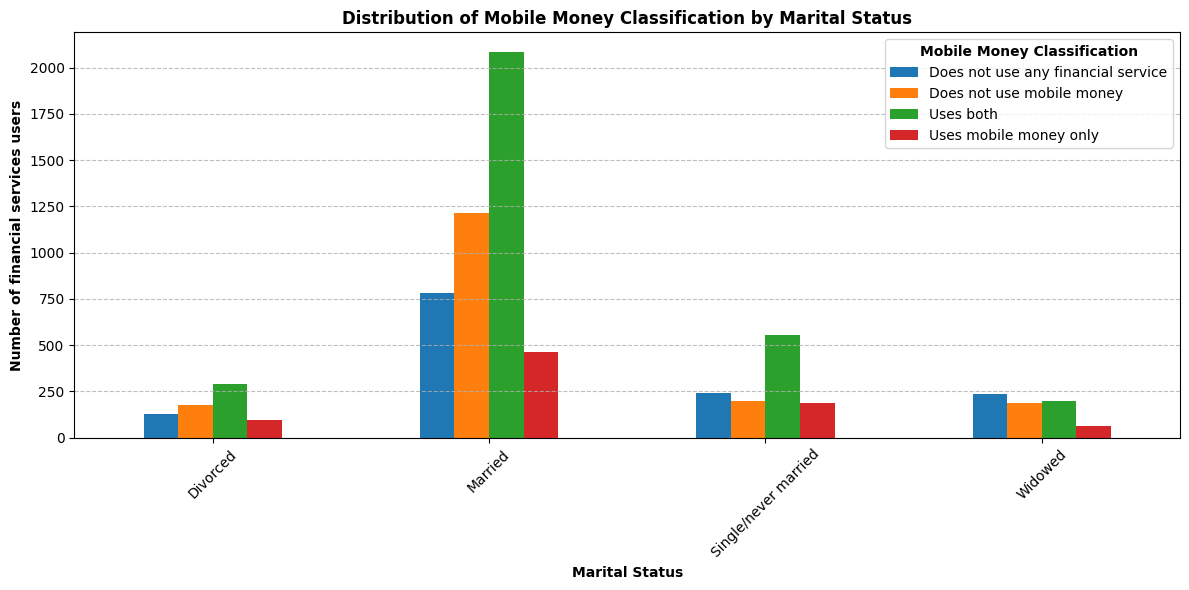

In [30]:
plot_mobile_money_classification(df=financial_df,
                                 column='Marital status',
                                 title='Distribution of Mobile Money Classification by Marital Status',
                                 xlabel='Marital Status')

After applying the `plot_mobile_money_classification` function comparing the marital statuses of users to the type of financial service they use the following results were obtained.

Upon initial observation, it is evident that a vast majority of the respondents who answered this question were married. Out of all the married individuals, most of them indicated that they use both mobile money and some other financial services, with responses exceeding 2000. This was followed by slightly less than 1250 users indicating that they use some other financial service, slightly more than 750 users indicating that they do not use any financial service, and lastly, less than 500 married participants indicating that they use both.

When observing all other marital statuses, it appears that for almost all of them, less than 500 people answered. Slightly more than 500 single people indicated that they use both mobile money and some other financial service. When observing the results from the widowed and single marital status, however, there is a higher response from users who do not use any financial services. This response was the highest in widowed users and second-highest in the single/never married category.

In all four marital status groups, it appears that the number of people who indicated that they use mobile money only is the lowest.

### 3.4 The relationship between land ownership and the type of financial service used

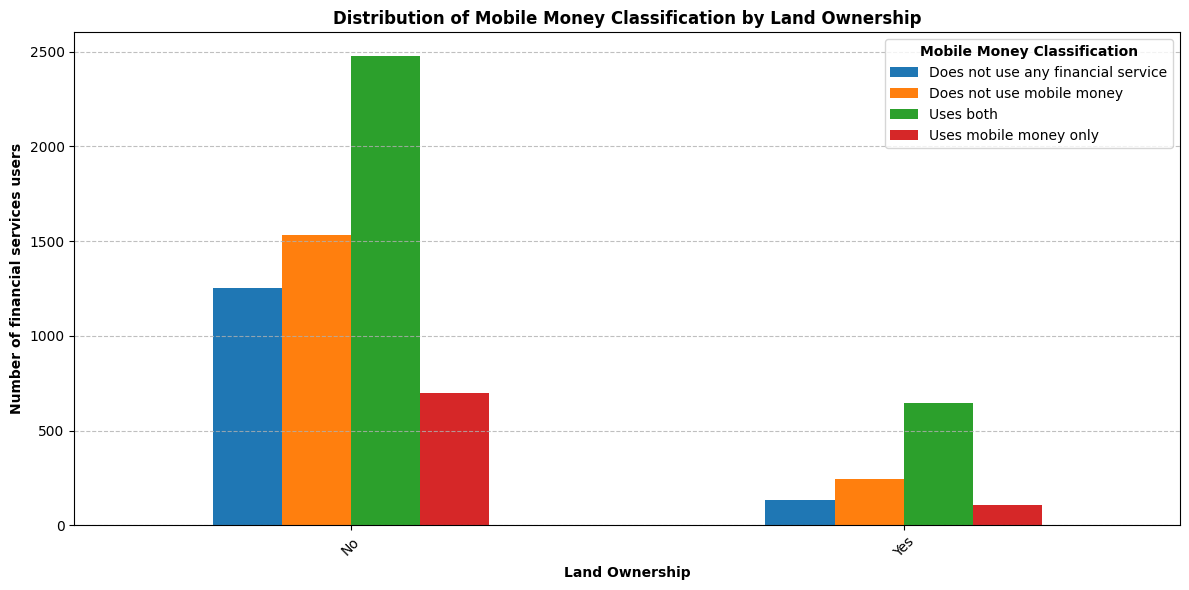

In [31]:
plot_mobile_money_classification(df=financial_df,
                                 column='Ownership of land with certificates',
                                 title='Distribution of Mobile Money Classification by Land Ownership',
                                 xlabel='Land Ownership')


After analyzing the response provided above, it appears that a small percentage of the participants who were asked to take part in the study owned land. However, upon closer examination, it is evident that both options show a similar pattern. Both responses indicate that the least number of people use only mobile money. The next group of users comprises those who do not use any financial service, with a more significant difference between those who do not own land compared to those who own land. The third group includes users who use mobile money along with some other financial service, with the latter response being slightly higher than the former. After that, there is a noticeable difference in the users' response who use both mobile money and some other financial service simultaneously.

### 3.5 The relationship between what type of income earned and the type of financial service used

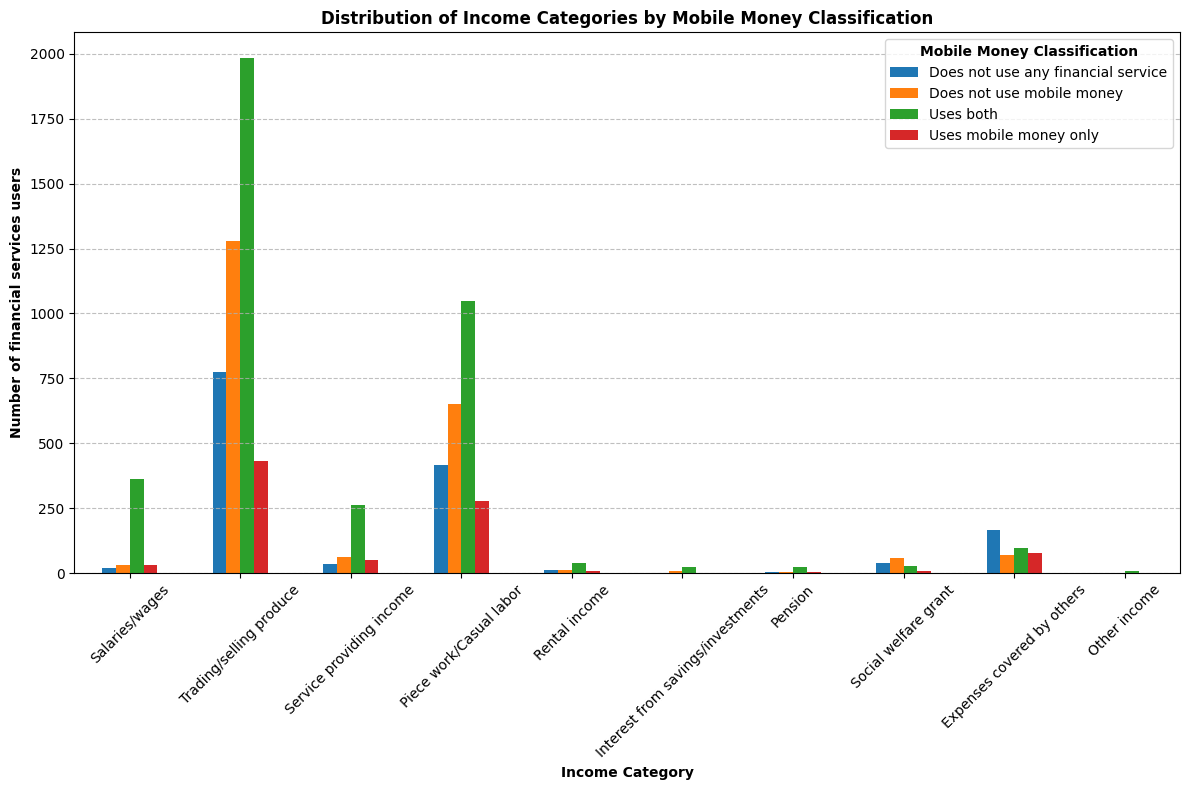

In [32]:
columns_to_plot = ['Salaries/wages', 'Trading/selling produce', 'Service providing income', 
                   'Piece work/Casual labor', 'Rental income', 'Interest from savings/investments', 
                   'Pension', 'Social welfare grant', 'Expenses covered by others', 'Other income', 
                   'Mobile money classification']

filtered_df = financial_df[columns_to_plot].copy()  
filtered_df.replace({'Yes': 1, 'No': 0}, inplace=True)

grouped_data = filtered_df.groupby(['Mobile money classification']).sum()
grouped_data_transposed = grouped_data.transpose()

grouped_data_transposed.plot(kind='bar', stacked=False, figsize=(12, 8))

plt.title('Distribution of Income Categories by Mobile Money Classification', fontweight='bold')
plt.xlabel('Income Category', fontweight='bold')
plt.ylabel('Number of financial services users', fontweight='bold')
legend = plt.legend(title='Mobile Money Classification', loc='best')
legend.get_title().set_fontweight('bold')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

To see how the distribution of users who use different financial services based on the type of income they earn, the `financial_df` dataframe was filtered to only have the columns `'Salaries/wages', 'Trading/selling produce', 'Service providing income', 'Piece work/Casual labor', 'Rental income','Interest from savings/investments', 'Pension', 'Social welfare grant', 'Expenses covered by others', 'Other', 'Mobile money classification'` and only choose the yes responses, this was then used as a criteria for the grouped bar graph for the 4 classifications for the type of financial service used.

Upon analyzing the bar graphs, it is evident that the majority of survey respondents earn their income from trading or selling produce, followed by piece work or casual labour, salaries or wages, and a service-providing income. The remaining income methods have very few responses, less than 200. 

Most users who earn a living from trading or selling produce prefer to use both mobile money and some other financial service. Following them are users who use some other financial service but not mobile money. Following that at 750 responses are users who did not use any financial service. A small number of users use mobile money exclusively. A similar trend is observed for users who earn their income from piece work. 

When it came to users who earned their income from salaries or wages and those who provided a service, the majority of their users indicated that they use both mobile money and some other financial service. However, for the other three income methods, there is minimal difference between users who do not use any financial service, those who use mobile money and those who use some other financial service. 

For the remaining income methods, there are very few responses, with most users indicating that they use both mobile money and some other financial service. The exception is users who receive social welfare, who prefer to use some other financial service and not mobile money. 

When analyzing users whose expenses are paid for by someone else, it is observed that there is a slight variance in the type of financial service they use, although the responses are generally low. Interestingly, the majority of these individuals do not use any financial services at all. This could be because they receive their funds from a source outside of the financial system, and therefore do not need to utilize any financial services since they are not responsible for managing the funds.

___

## 4. Conclusion

The object of this report was to analyze the survey response from the FSDT Finscope 2017 survey, containing demographic information and financial service details of around 7,094 individuals in Tanzania and see what insights could be drawn from them regarding the type of financial services they use. Before the initial analysis of the report could take place a check was put in place to ensure that all the responses from the dataframe were valid. After checking and replacing the invalid responses from the dataframe, all the responses were valid.

From the `Age` column, the `describe()` function was used and it was found that the average age of participants was of the age 38,24 &asymp; 38, with the youngest being 16 and the oldest being 100 years. For the remaining columns, the numerical responses were substituted with the actual responses and thus the `describe()` method would not work with them as they were now `object` data types and thus `financial_df.columns.astype('object').describe()` would suffice and some visualisations were provided for columns that needed more emphasis.

While the graphs were to determine how the distribution of the responses for the respective columns was, the analysis wanted to look at the relationship between these columns and the `Mobile money classification` column and how these columns, `Age`, `Gender`, `Marital Status`, `Land Ownership` and type of income were influenced by it.

From the respective graphs, according to age, it appears that many users prefer using both mobile money and some other mobile money with the highest number of users of such services being younger than the mean age, with almost all age groups indicating that they would rather opt for both or only use some other form of mobile money. It was also observed that the third option following these responses was users who indicated that they did not use any financial service at all, with the highest responses coming from the youngest age interval with the reasoning being that they might not have any money or the money they possess might be insufficient to require the need for a financial service.

When it comes to the use of mobile money, there is no significant difference in the distribution of usage between genders. A vast majority of both male and female users prefer to use both mobile money and some other financial service. This is followed by the option to use some other financial service, apart from mobile money. The third option is not using any financial service at all. The least preferred option is to use mobile money only.

When looking at the marital statuses, they were divided into 4 groups 'Married', 'Divorced', 'Widowed', 'Single/never married', and with all four groups, the responses were the same, with most users indicating they prefer to use both mobile money and some other financial service, followed by using some other financial service except mobile money, but in the case of users who were either divorced or single/never married, the second most chosen option was that they did not use any financial service with the least number of responses being that they use mobile money only in all categories. 

The same distribution is seen in the following columns  `Distribution of Mobile Money Classification by Land Ownership` and the `Distribution of Mobile Money Classification by Income Category` graph. In both graphs, it appears that a majority of people indicate that they opt to use mobile money concurrently with some other financial service.


It appears from the responses that most users do not solely rely on mobile money, instead, they prefer to use it in combination with other financial services, regardless of their age, marital status, gender, land ownership or type of income. In most cases, the second option was to use some other available financial service, or they would indicate that they do not use any financial service at all. There could be several reasons for this, such as a lack of technological literacy, insufficient knowledge of the service or even a lack of access to the required devices for such services. As mobile devices are increasingly becoming a part of our daily lives and other lifestyle choices, some people may not trust using them beyond their original design, as the idea of using mobile devices for financial services is still a relatively new and ever-changing concept.